## Zadanie domowe 1
##### Nina Mądra 268444

### Probablistyczna aproksymacja całki

#### Generowanie $n$ punktów z prostokąta $ [a,b] \times [0,M] $

In [1]:
import random

def generatePoints(n, a, b, M):
    points = []
    for i in range (n):
        points.append((random.uniform(a, b), random.uniform(0, M)))
    return points

#### Zliczanie punktów, które leżą pod wykresem funkcji

In [2]:
def countBelow (function, points):
    count = 0
    for point in points:
        if(point[1] <= function(point[0])):
            count = count +1
    return count

#### Aproksymowanie całki

In [3]:
def integralApproximation(n, a, b, M, C):
    return C/n*(b - a)* M

#### Testowanie funkcji generowania, zliczania punktów i aproksymowania

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
x,0.845503,0.633243,1.870130,0.244854,0.965640,2.171618,2.321002,2.395741,1.579867,2.906741,...,2.841635,0.360507,2.437812,2.809063,0.615430,2.079626,2.557169,2.721991,1.492700,3.018748
y,0.403138,0.343749,0.427148,0.132056,0.349934,0.552173,0.204360,0.837952,0.111392,0.141862,...,0.112642,0.232477,0.062981,0.013058,0.941173,0.948797,0.904534,0.153771,0.612556,0.315667


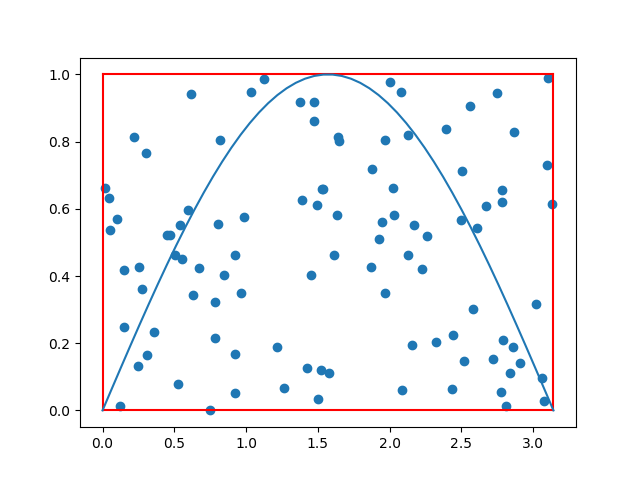

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame
import math

n = 100
a = 0
b = math.pi
M = 1
points = generatePoints(n,a,b,M)

df = DataFrame (points,index = np.arange(1,101),columns=["x","y"])
display (df.T)

x = np.linspace(0,b)
y = np.linspace(0,M)
plt.scatter(*zip(*points))
plt.plot(x,0*x+0, color = 'red')
plt.plot(x,0*x+M, color = 'red')
plt.plot(0*y+a,y, color = 'red')
plt.plot(0*y+b,y, color = 'red')
plt.plot(x,np.sin(x))
plt.show()

Wizualizacja wylosowanych punktów z prostokąta $[0,\pi] \times [0,1]$ oraz funkcji $ \sin(x)$ na przedziale $[0,\pi]$.

In [5]:
C = countBelow(np.sin,points)
print("Liczba punktów pod wykresem funkcji:",C)

Liczba punktów pod wykresem funkcji: 66


In [6]:
integral = integralApproximation(n,a,b,M,C)
print("Probabilistyczna aproksymacja całki:",integral)

Probabilistyczna aproksymacja całki: 2.0734511513692637


$\int_{0}^{\pi} sin(x) dx = 2 $

### Obliczanie wartości całek

In [7]:
def integral(a,b,M,function):
    label ='wynik pojedyńczej aproksymacji całki'
    label2 ='średnia aproksymacja dla danego n'
    avgIntegral = 0
    for n in range (50,5000,50):
        avgIntegral = 0
        integrals = []
        for k in range (50):
            tempIntegral = integralApproximation(n,a,b,M,countBelow(function,generatePoints(n,a,b,M)))
            integrals.append((n,tempIntegral))
            avgIntegral += tempIntegral
        avgIntegral /= 50
        plt.scatter(*zip(*integrals), s=0.5, c = 'steelblue', label=label)
        label = "_nolegend_"
        plt.scatter(n,avgIntegral, s=5, c = 'crimson', label=label2)
        label2 = "_nolegend_"
    return avgIntegral

#### Wyniki eksperymentu dla całki $\int_{0}^{8} \sqrt[3]{x}dx = 12$

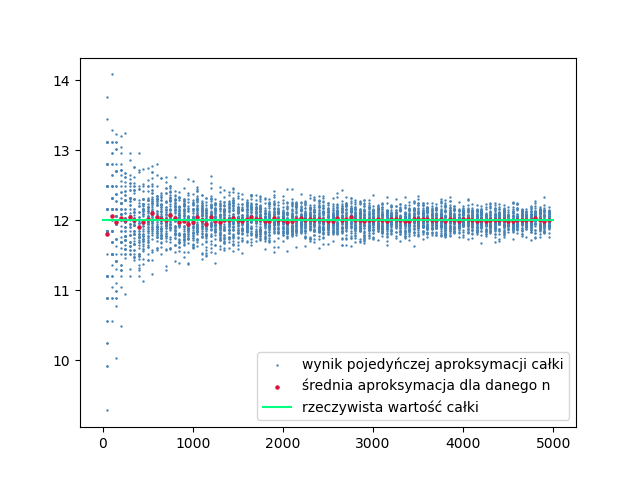

In [8]:
x = np.linspace(0,5000)
integral(0,8,2,np.cbrt)
plt.plot(x,0*x+12, color = 'springgreen', label='rzeczywista wartość całki')
plt.legend(loc='lower right')
plt.show()

#### Wyniki eksperymentu dla całki $\int_{0}^{\pi} sin(x) dx = 2 $

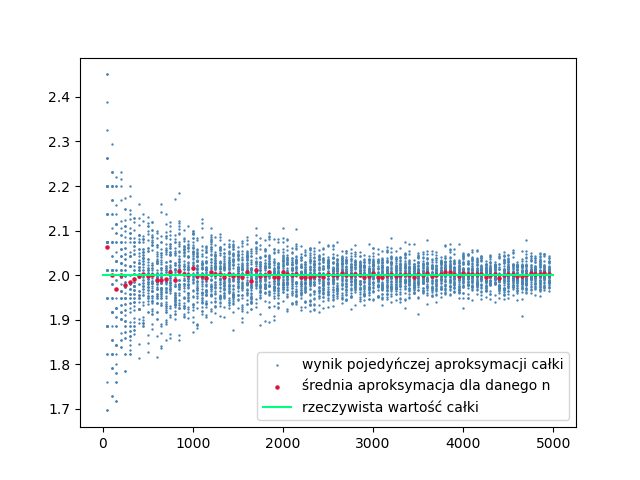

In [9]:
x = np.linspace(0,5000)
integral(0,math.pi,1,np.sin)
plt.plot(x,0*x+2, color = 'springgreen', label='rzeczywista wartość całki')
plt.legend(loc='lower right')
plt.show()

#### Wyniki eksperymentu dla całki $\int_{0}^{1} 4x(1-x)^3 dx = \frac{1}{5} $

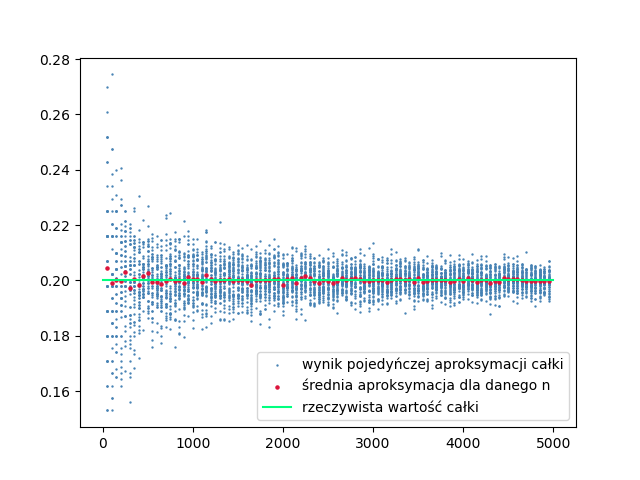

In [10]:
def f(x):
    return 4*x*(1-x)**3

integral(0,1,0.45,f)
plt.plot(x,0*x+0.2, color = 'springgreen', label='rzeczywista wartość całki')
plt.legend(loc='lower right')
plt.show()

#### Wnioski
Aproksymacja jest tym dokładniejsza, im więcej punktów wylosujemy.

### Wyznaczanie aproksymacji liczby $ \pi $

Rozważamy półkole$^*$ (koło o środku w punkcie $(1,0)$ i promieniu $1$ ograniczone prostą $y=0$.
Wiadomo, że pole rozważanego półkola, oznaczane przez $P$ wynosi: $P = \frac{1}{2}\pi r^2$, gdzie $r=1$.
Mamy zatem: $\pi = 2P$. <br>

$^*$ Rozważam półkole zamiast koła, aby wykorzystać napisaną funkcję countBelow zliczającą punkty poniżej funkcji $f: [a,b] \to \mathbb R_{> 0}$

Pole półkola wyznaczamy jako całkę pod krzywą $ y=\sqrt(1-(x-1)^2)$ na przedziale $[0,2]$.

In [11]:
def f(x):
    return np.sqrt(1-(x-1)**2)

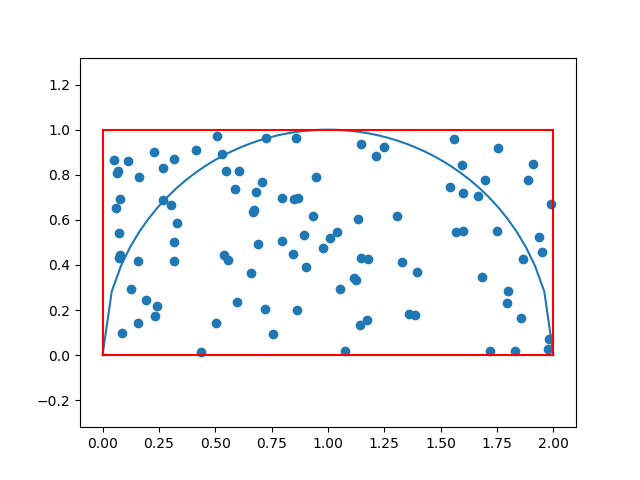

In [12]:
#TESTOWANIE + WIZUALIZACJA
n = 100
a = 0
b = 2
M = 1
points = generatePoints(n,a,b,M)
x = np.linspace(a,b)
plt.plot(x,f(x))
plt.scatter(*zip(*points))
plt.plot(x,0*x+0, color = 'red')
plt.plot(x,0*x+M, color = 'red')
plt.plot(0*y+a,y, color = 'red')
plt.plot(0*y+b,y, color = 'red')
plt.axis('equal')
plt.show()

Wizualizacja wylosowanych punktów z prostokąta $[0,2] \times [0,1]$ oraz funkcji $ y=\sqrt(1-(x-1)^2)$ wyznaczającej półkole na przedziale $[0,2]$.

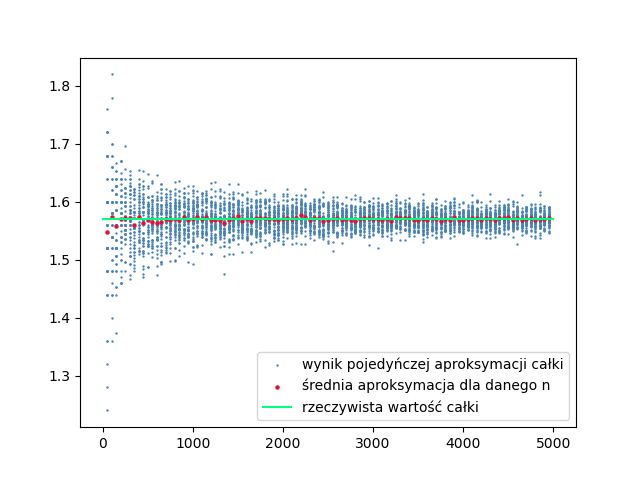

Aproksymacja pola = 1.5721292929292932
Aproksymacja liczby pi = 3.1442585858585863


In [13]:
x = np.linspace(0,5000)
pi = integral(0,2,1,f)
plt.plot(x,0*x+math.pi/2, color = 'springgreen', label='rzeczywista wartość całki')
plt.legend(loc='lower right')
plt.show()
print("Aproksymacja pola =",pi)
pi *= 2
print("Aproksymacja liczby pi =",pi)